# Statistical Hypothesis Testing

In this notebook we will brefiely review concepts in hypothesis testing and its implementation in R. Let's see


## Overview

Hypothesis testing is a statistical procedure in which a choice is made between a null hypothesis and an alternative hypothesis based on evidence from samples and probability theory. Although each hypothesis test is a little different, the main thought is the same.


Regardless of the specific hypothesis test one is conducting, there are several steps common to all hypothesis
tests.

## Steps for performing Hypothesis Testing

**1. Identify the null hypothesis ($H_{0}$) and the alternative hypothesis ($H_{a}$)**
    
   Each hypothesis test includes two hypothesis about the population and NOT about a sample of that population: 
   
   * The *null hypothesis*, denoted $H_{0}$, is a statement about the values of one or more population parameters. $H_{0}$ is assumed to be true until there is evidence to suggest otherwise. The null hypothesis will always be an assertation containing an equal sign.

    
   * The *alternative hypothesis*, denoted $H_{a}$, is a statement that contradicts the null hypothesis and that is thought to hold if $H_{0}$ is rejected.
    
   
   Hypothesis tests are classified according to the sign of the alternative hypothesis as follows:

| **Symbol in $H_a$** | **Terminology**       |
|---------------|-------------------|
| <             | Left-tailed test  |
| >             | Right-tailed test |
|$\neq$               | Two-tailed test   |


** 2. Identify the test statistic (*$T$*) and its sampling distribution and evaluate *$T$* for sample data, *$T_{n}$* **

The test statistic assumes a central role in a hypothesis test because by deciding which test statistic
to use one determines a hypothesis test to a large extend. 

The sampling distribution is the distribution of the test statistic, *T*, which is a random variable, given some assumptions. We use the sampling distribution to calculate probabilities for how unusual *$T_{n}$* is if the null hypothesis is true.

Some examples of test statistics are t-statistic, z-score, F value and their respective sampling distributions are the Student's T distribution, the standard normal distribution and the F-distribution. For distributions other than the z distribution, the shape of the distribution depends on the degrees of freedom.



**3.Choose the significance level ($\alpha$)**

The significance level, denoted by $\alpha$, is the probability of rejecting the null hypothesis when it is actually true. 

The choice of $\alpha$ is somewhat arbitrary, although in practice values of 0.1, 0.05, and 0.01 are common. 

**4. Compute the critical value or the p-value of the test statistic**

There are two alternative but equivalent approaches to hypothesis testing: the critical value approach and the p-value approach. So, in this step, you can either calculate the critical value or the p-value of the test statistic. You will arrive to the same conclusion with both approaches.

* **Critical value ($T_{c}$) **


Critical values depend upon the test statistic, *T*, and the significance level, $\alpha$. 

Critical values are essentially cut-off values of the test statistic, *T*, that define the region(s) where the test statistic is unlikely to lie; This region is often referred as the rejection region.

Depending on the $H_{a}$, each type of test has its own kind of rejection region:

| **Symbol in $H_a$** | **Terminology**       | ** Rejection Region ** |
|---------------|-------------------|-------------------|
| <             | Left-tailed test  | (−$\infty$, $T_{c}$] |
| >             | Right-tailed test | [$T_{c}$, $\infty$)
|$\neq$               | Two-tailed test   |(−$\infty$, $T_{c}$] U [$T_{c}$', $\infty$)


* **P-value**

The **p-value**  is the probability of the test statitisc, *$T$*, being at least as extreme as the one observed , *$T_{n}$*, given that the null hypothesis is true. The smaller the p-value, the stronger the evidence the sample data provide against $H_{0}$. That is, a small p-value indicates that the null hypothesis is unlikely to be true. 



Each type of test has its own kind of p-value:

| **Symbol in $H_a$** | **Terminology**       | ** P-value ** |
|---------------|-------------------|-------------------|
| <             | Left-tailed test  | P( T <  $T_{n}$ $|$ $H_{0}$ is True) |
| >             | Right-tailed test | P( T > $T_{n}$ $|$ $H_{0}$ is True )  |
|$\neq$               | Two-tailed test   | 2P( T > $T_{n}$) $|$ $H_{0}$ is True )|

5.**Identify the decision rule**

The decision rule states when to reject or fail to reject the null hypothesis. Remember, you cannot actually accept the null hypothesis -- you can only reject or fail to reject the null hypothesis!

 * **Critical Value Approach**

Compare the test statistics computed in *Step 2*, *$T_{n}$*, to the critical value computed in *Step 4*, *$T_{c}$*, and make a decision based on the type of hypothesis testing.

|    Type of test   |                                 Decision                                                      |
|:-----------------:|:------------------------------------:|---------------------------------------|
|                   | **Reject $H_{0}$ **                           | **Fail to Reject $H_{0}$**                    |
| Left-tailed test  |  $T_{n}$ < $T_{c}$    |  $T_{n}$ $\geq$ $T_{c}$    |
| Right-tailed test |  $T_{n}$ > $T_{c}$    |  $T_{n}$ $\leq$ $T_{c}$     |
| Two-tailed test   |  $|$$T_{n}$$|$ > $T_{c}$   | $|$$T_{n}$$|$ $\leq$ $T_{c}$  |

* **P-value Approach**

Compare the p-value computed in *Step 4* to the significance level chosen in *Step 3* and make a decision:

- Reject $H_{0}$, if p-value $\leqslant$ $\alpha$
- Fail to reject $H_{0}$, if p-value > $\alpha$



6.**State the conclusion in the context of the situation**

The last step consist on formulating the decision in the context of the problem.



## Hypothesis Testing in R

Now let's jump to an example and see how we can implement hypothesis testing in R. We will use the student sales data from the lectures. 

Specifically, we will test whether or not a linear relationship exists between the advertising expenditures and the sales in the population. That is, we want to evaluate if the population slope $\beta_1$ is unlikely to be 0.
 

Let's read the data first and obtain our OLS regression coefficients.

In [2]:
# Read data
meddcor = read.table("meddcor.txt", sep="", header = FALSE)

# Set the names of the columns
colnames(meddcor) = c("sales", "advertising", "bonuses", "marketshare", "largestcomp", "region")

# Fit a simple linear regression model with advertising as the predictor
model = lm(sales ~ advertising, data = meddcor)
summary(model)


Call:
lm(formula = sales ~ advertising, data = meddcor)

Residuals:
    Min      1Q  Median      3Q     Max 
-137.56  -92.63  -19.54   97.51  170.12 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -157.3301   145.1912  -1.084     0.29    
advertising    2.7721     0.2794   9.921 8.87e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 101.4 on 23 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8024 
F-statistic: 98.43 on 1 and 23 DF,  p-value: 8.873e-10


Let's follow the hypothesis test steps discussed above in conducting a hypothesis test for the population slope $\beta_1$.

 ### Alternative Solution 1: The Critical Value Approach

* **Step 1:** Identify the null hypothesis ($H_{0}$) and the alternative hypothesis ($H_{a}$)

Let $\beta_1$  be the true slope parameter. The relevant hypotheses are:

$H_{0}$:  $\beta_1$ = 0

$H_{a}$:  $\beta_1$ $\neq$ 0

 

* **Step 2:** Identify the test statistic and its sampling distribution and evaluate it for sample data **

The sampling distribution of $\hat{\beta}_1$ is the Student's t-distribution with n-p-1 degrees of freedom. Thus, the test statistic is: 

t-value = $\frac{\hat{\beta}_{1} - c}{se(\hat{\beta}_1)}$ = $\frac{\hat{\beta}_{1}}{se(\hat{\beta}_1)}$ $\sim$ $t_{(23)}$

, where *c* is the hypothesized value of $\beta_1$ in the null hypothesis.

Let's evaluate the t-value for the sample data.


In [3]:
# Evaluate t-value
tvalue = round(summary(model)$coefficients[2,1]/summary(model)$coefficients[2,2],3)
tvalue

[1] 9.921

Note that this value matches the t-value for advertising shown in the summary of our model! This is because the t-values and p-values shown in the model output are always calculated assuming the alternative hypothesis is testing the two-tailed  $\beta_i$ $\neq$ 0. So, the model output won't be helpful for hypothesis testing that have other alternative hypothesis for the regression coefficients. Thus, the importance to learn the underlying logic behind statistical hypothesis testing.

* **Step 3:** Choose the significance level ($\alpha$)

We will pick a 5% level of significance, $\alpha$ = 0.05, for our example.

In [4]:
# Set alpha equal to 0.05
alpha = 0.05

* **Step 4:** Compute the critical value

To calculate this value we can use R's built in probability distribution functions. In this notebook we will examine the details about the commands associated with the Student's t distribution, but the functions for different distributions are very similar. To get a full list of the distributions available in R you can use the following command:

In [5]:
help(Distributions)

There are four functions that can be used to generate the values associated with the Student's t distribution. You can get a full list of them and their options using the help command:

In [6]:
help(TDist)

In order to calculate the critical value(s), we can use the qt() function. The idea behind qt is that you give it a probability *p*, and the degrees of freedom *df* and it returns the number whose cumulative distribution matches the probability. 

By default, the qt(p = $\alpha$, df) function gives the t-value corresponding to a given lower-tailed area as shown bellow.

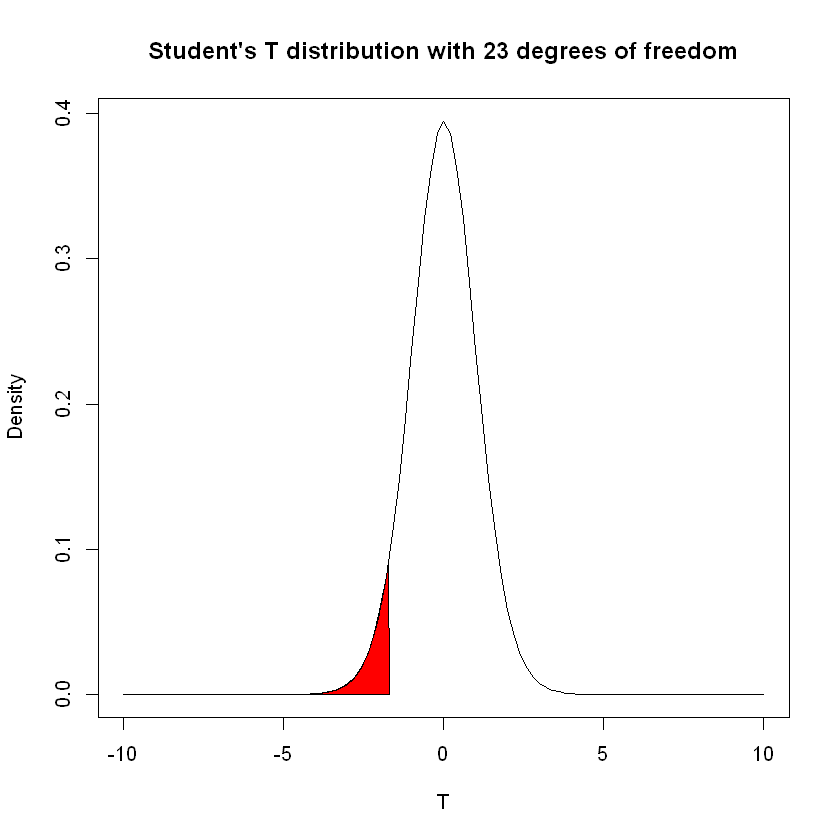

In [7]:
# Create a sequence of 100 equally spaced numbers between -3 and 3
x <- seq(-10, -10, length=100)

# Number of observations
n = nrow(meddcor)

# Degrees of freedom
df = n -length(coef(model))

# Draw the curve
curve(dt(x, df), xlim=c(-10,10), main= "Student's T distribution with 23 degrees of freedom", ylab = "Density", xlab ="T")
 
# Define shaded region
from.t <- -10
to.t <- qt(alpha, df)
S.x  <- c(from.t, seq(from.t, to.t, 0.01), to.t)
S.y  <- c(0, dt(seq(from.t, to.t, 0.01),df), 0)
polygon(S.x, S.y, col="red")

But since the test that we are performing is a two-sided test we will have to adjust the probability passed to qt() to obtain the correct critical t-values. There are two critical values for the two-tailed test, one for the left-tail denoted  and one for the right-tail denoted. The left-tail critical value is the t-value such that the probability to the left of it is $\alpha/2$, and the right-tail critical value is the t-value such that the probability to the right of it is $\alpha/2$.

In [8]:
# Calculate critical values 
crit.val = qt(c((alpha/2), 1-(alpha/2)), df) 
round(crit.val, 4)

[1] -2.0687  2.0687

These values allow us to build our rejection regions. Visually, the rejection regions are shaded red in the following graph. 

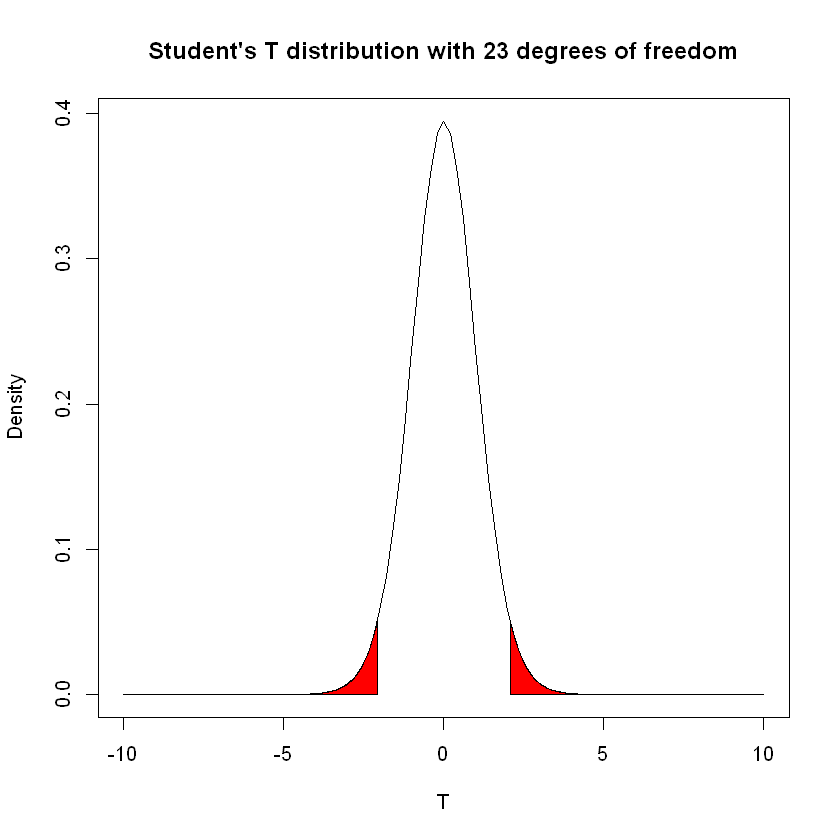

In [9]:
# Create a sequence of 100 equally spaced numbers between -3 and 3
x <- seq(-10, 10, length=100)

# Draw the curve
curve(dt(x, df), xlim=c(-10,10), main= "Student's T distribution with 23 degrees of freedom", ylab = "Density", xlab ="T")
 
# Define shaded region
from.t <- -10
to.t <- qt(alpha/2, df)
S.x  <- c(from.t, seq(from.t, to.t, 0.01), to.t)
S.y  <- c(0, dt(seq(from.t, to.t, 0.01),df), 0)
polygon(S.x, S.y, col="red")
S.x  <- c(-to.t, seq(-to.t, -from.t, 0.01), -from.t)
S.y  <- c(0, dt(seq(-to.t, -from.t, 0.01),df), 0)
polygon(S.x, S.y, col="red")

**Step 5:** Identify the decision rule

Since this a two-sided test, we will reject $H_{0}$ if the t-value lies on either rejection region. So, we will reject $H_{0}$ if test statistics <  - Critical value or test statistics > Critical value

In [10]:
# Decision rule

abs(tvalue) > crit.val[2]

[1] TRUE

Since the absolute value of the test statistic (9.921) is much greater than the positive critical value (2.069), we reject the null hypothesis at $\alpha$ = 0.05.

**Step 6:** Conclusions

The data provide strong evidence that the population slope is nonzero at $\alpha$ = 0.05. Hence, a linear relationship exists between the advertising expenditures and the sales in the population.

 ### Alternative Solution 2: The P-Value Approach

All steps up to step 4 are the same as for the critical value approach. So let's jump into the calculation of the p-value.

* **Step 4:**  Compute the p-value

We will use the pt() function to find the p-value associated to the t-statistics. To find out more about this function, type ?pt in the console.

For a single-sided hypothesis test, how we calculate the p-value depends on the sign of the alternative hypothesis. For a left-tailed test, we need to calculate the area to the left of the oberved t-statistic and we can use pt(tvalue, df) as-is. For a right-tailed test, we need to calculate the area to the right of the observed t-statistic. Since the total area under the curve is 1, we can calculate the area for the left section and then subtract it from 1. Hence, for a a right-tailed test we have to use 1 - pt(tvalue, df). 

For a double-sided hypothesis test, like this one, we have to look at both the left and right tail areas of our curve. Since the Student's t-distribution is symmetrical, we just need to calculate the area under one of the tails, and then multiply it by two.

In [11]:
# Calculate p-value - Alternative 1
pvalue = 2*(1-pt(abs(tvalue), df))
pvalue

[1] 8.876822e-10

Equivantely, instead of subtracting the left area from 1, we could set the lower.tail parameter to FALSE. Setting lower.tail to FALSE tells the function that we want to calculate the area under the curve that is greater than the t-value. Since the t-value is positive, and we're looking at the tails, we set lower to be False. We can always use the absolute value to account for both positive and negative t-values. 

In [12]:
# Calculate p-value - Alternative 2
pvalue = 2*(pt(abs(tvalue), df, lower.tail=FALSE))
pvalue

[1] 8.876821e-10

Note that this value also matches the p-value for advertising shown above in the summary of our model!

* **Step 5:** Identify the decision rule

We reject $H_{0}$ if p-value < $\alpha$

In [13]:
# Decision rule
pvalue < alpha

[1] TRUE

Since the p-value of the test statistic is less than the alpha value, we reject the null hypothesis at $\alpha$ = 0.05.

 * **Step 6:** Conclusions

The data provide strong evidence that the population slope is nonzero. Hence, the variable advertising appears to be statistically useful in estimating sales.